In [2]:
import numpy as np
import pandas as pd
import os

# Gerando dataset full

In [3]:
# dir files are located
path = '/home/andre/Downloads/files/'

In [4]:
df = None
for r, d, f in os.walk(path):
    for file in f:
        try:
            temp = pd.read_csv(path + file, error_bad_lines = False)
            if df is None:
                df = temp
            else:
                df = pd.concat([df, temp], axis = 0, ignore_index = True)
        except Exception as e:
            print(file)
            print(e)

b'Skipping line 5339: expected 8 fields, saw 10\n'
b'Skipping line 4208: expected 8 fields, saw 9\nSkipping line 14644: expected 8 fields, saw 10\n'
b'Skipping line 14639: expected 8 fields, saw 10\n'
b'Skipping line 1132: expected 8 fields, saw 9\nSkipping line 7419: expected 8 fields, saw 10\n'
b'Skipping line 14195: expected 8 fields, saw 10\n'
b'Skipping line 5048: expected 8 fields, saw 9\n'
b'Skipping line 8923: expected 8 fields, saw 10\n'
b'Skipping line 12982: expected 8 fields, saw 10\n'
b'Skipping line 1047: expected 8 fields, saw 10\n'
b'Skipping line 1548: expected 8 fields, saw 9\nSkipping line 2882: expected 8 fields, saw 9\n'
b'Skipping line 13967: expected 8 fields, saw 10\n'
b'Skipping line 1804: expected 8 fields, saw 9\nSkipping line 4270: expected 8 fields, saw 10\n'
b'Skipping line 5968: expected 8 fields, saw 10\n'
b'Skipping line 7421: expected 8 fields, saw 10\nSkipping line 8944: expected 8 fields, saw 10\n'
b'Skipping line 1372: expected 8 fields, saw 9\n'
b'

In [5]:
# gerando o dataset full
df.to_csv('./full_dataset.csv', index = None)

# Limpeza dos dados

In [6]:
df.dropna(subset = ['encrypted_buyer_cpf'], inplace = True)

In [7]:
from datetime import datetime
df['dateTime'] = df['dateTime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.000Z'))

In [8]:
df.drop('encrypted_buyer_cnpj', axis = 1, inplace = True)

In [17]:
df['productTotal'] = df['productTotal'].apply(float)

In [26]:
df.reset_index(drop = True, inplace = True)

# Análise exploratoria dos dados

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [10]:
df.head()

,encrypted_domain,encrypted_cnpj,encrypted_saleid,dateTime,productTotal,prod_fullname,encrypted_buyer_cpf
89,6139646137356433363237396637323937336161383832...,c6ff3c4b6f74f5e29a1bdeabdcc3,6633313930633530336638393862633334626466383636...,2018-10-05 17:56:38,140.362,gasolina comum,6130353534346532323630313964383964373936643339...
107,6139646137356433363237396637323937336161383832...,dc8e4dc39eee8752dc47cb3622ba,6162366565383162353532353439646238373336633364...,2018-11-29 06:29:13,60.0012,gasolina comum,3662616338613465643033306236343134363063616165...
111,6139646137356433363237396637323937336161383832...,ac59cda296731f6cbb3d74a37007,3335343565316263636363656137316634653135623832...,2018-10-29 08:52:40,165.081,gasolina aditivada,6538326130613130383265633531396334376662643230...
151,6139646137356433363237396637323937336161383832...,c725c3512e48af495bf5f35bf8c3,6261313932363331366161333133363436323638353038...,2018-11-26 14:57:22,235.258,gasolina grid,6530643461373561643166656138633035653534383234...
235,6139646137356433363237396637323937336161383832...,1d1616faa7bba008e11ade1dc818,3137616264363434366330393534346431393161333137...,2018-12-03 12:21:21,5.5,bebida pronta cafe leite g 1un,3262366362343761613361336635363563363963313661...


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525215 entries, 0 to 525214
Data columns (total 7 columns):
encrypted_domain       525215 non-null object
encrypted_cnpj         525215 non-null object
encrypted_saleid       525215 non-null object
dateTime               525215 non-null datetime64[ns]
productTotal           525215 non-null float64
prod_fullname          525215 non-null object
encrypted_buyer_cpf    525215 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 28.0+ MB


## Análise de cpf's

In [49]:
print(f'cpf unicos: {len(df["encrypted_buyer_cpf"].unique())}')

cpf unicos: 105636


In [63]:
print(f'clientes com mais compras: \n\n{df.groupby("encrypted_buyer_cpf").count()["encrypted_domain"].sort_values(ascending = False)[0:20]}')

clientes com mais compras: 

encrypted_buyer_cpf
3264383032613763326131653863326564326130623736343733396136306164    349100
6361653363353332616531376531356466626335653165653234636134326664     11991
6439646133306235346238393937353434303735623665656561396138373565      6181
3130313932656530383033313436313733393761373632373735636133326539      4856
3336326439303764313766626336623334636433626534666362313739613738      3706
3835646130323664663762346639613861346135373835303232393365353531      3581
3137363966616663616434616436326137373637363135366439353737363136      3519
3463623365623136373436316134353738656635303639653638343734623331      2816
6435356137633462323238663262386463333565333061613337343163643066      1232
6264336336646165626338613239383632666461356562613736356139633566      1163
6430326337616136623931313938616465626130653563353030663739613764       937
3865373232323439313834323036623933363765346435616231613166316336       853
356434663637633934653866376236383563366365303235633

## Análise de produtos

In [70]:
print(f'produtos mais comprados: \n\n {df.groupby("prod_fullname").count()["encrypted_domain"].sort_values(ascending = False)[0:40]}')

produtos mais comprados: 

 prod_fullname
gasolina comum                                        3316
buffet kg                                             1603
miniatura coração variados un                          723
ac. salada com molho italiano                          689
milho para pipoca premium a granel                     592
pacoquita diet quadrada emb 22g (24)                   587
vertix lixa descartável 17cm unid 1                    564
etanol                                                 554
cafe espresso                                          548
pipoca canjica doce 50g (36)                           545
ac. molho vinagrete                                    527
desincha sch 1g (90)                                   525
bananada  l sem add acucar 250g                        517
gasolina aditivada                                     512
salgado integral (lanchonete)                          500
pao de queijo                                          497
papel seda    

## Análise de hora/dia

In [78]:
df['hour'] = df['dateTime'].apply(lambda x: x.hour)

In [113]:
df['weekday'] = df['dateTime'].apply(lambda x: x.weekday())

Text(0, 0.5, 'quantidade de compras feitas')

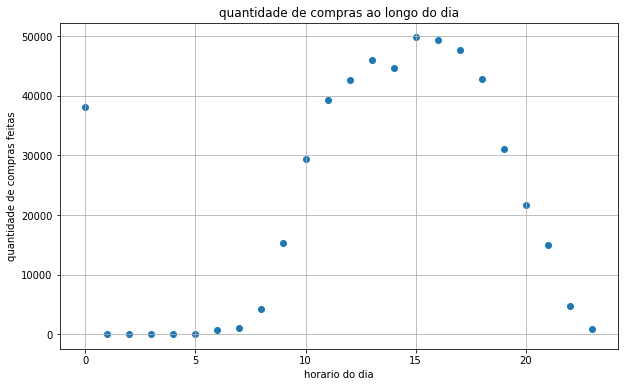

In [97]:
count_hour = df.groupby('hour').count()['encrypted_domain']
plt.figure(figsize = (10, 6))
plt.scatter(np.arange(len(count_hour)), count_hour)
plt.grid()
plt.title('quantidade de compras ao longo do dia')
plt.xlabel('horario do dia')
plt.ylabel('quantidade de compras feitas')

# o que acontece as 0 horas? seria um erro na base?

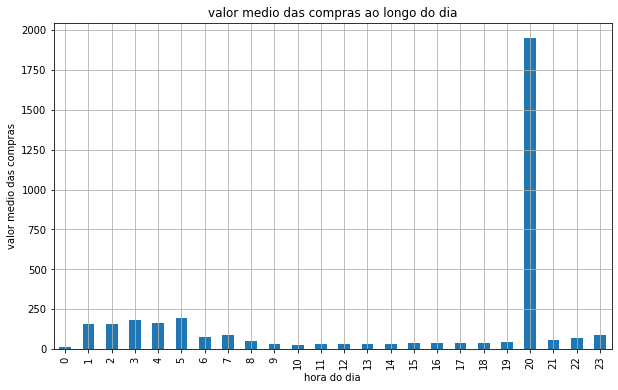

In [140]:
plt.figure(figsize = (10, 6))
df.groupby('hour').mean()['productTotal'].plot.bar()
plt.grid()
plt.title('valor medio das compras ao longo do dia')
plt.xlabel('hora do dia')
plt.ylabel('valor medio das compras');

# as 20hrs parece ter um outlier

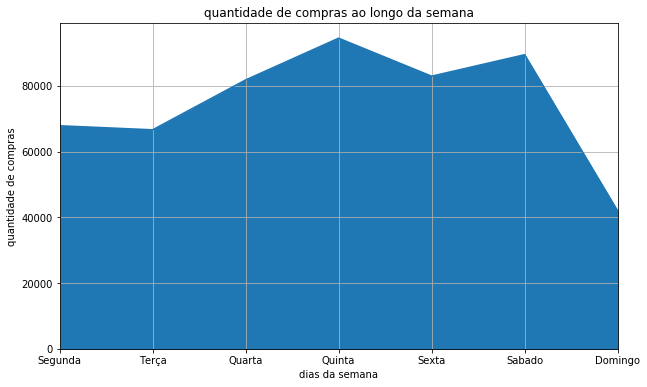

In [141]:
plt.figure(figsize = (10, 6))
df.groupby('weekday').count()['encrypted_domain'].plot.area()
plt.xticks(range(7), ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']);
plt.grid()
plt.title('quantidade de compras ao longo da semana')
plt.xlabel('dias da semana')
plt.ylabel('quantidade de compras');

# parece que podemos o dia da semana não interfere muito nas compras

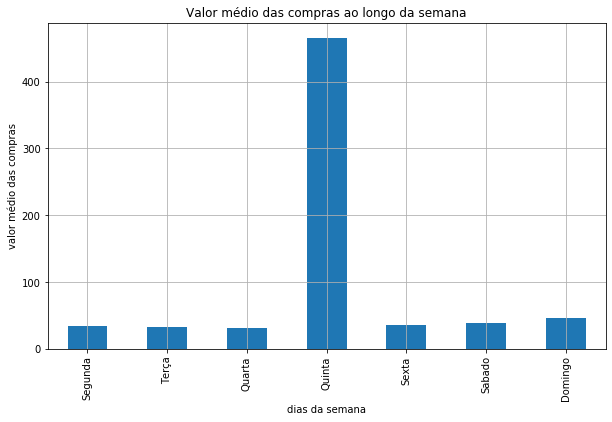

In [153]:
plt.figure(figsize = (10, 6))
df.groupby('weekday').mean()['productTotal'].plot.bar()
plt.xticks(range(7), ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']);
plt.grid()
plt.title('Valor médio das compras ao longo da semana')
plt.xlabel('dias da semana')
plt.ylabel('valor médio das compras');

# quinta parece ser um outlier?

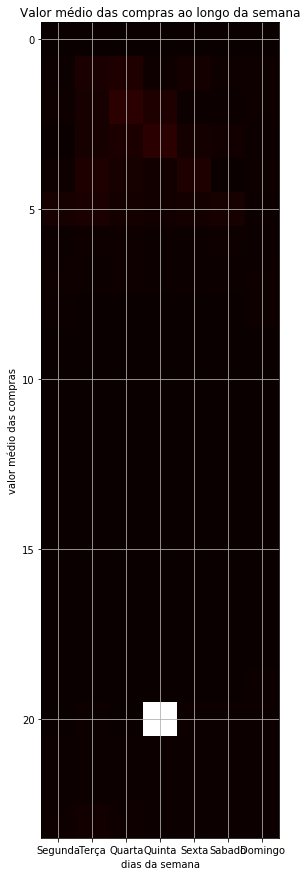

In [183]:
plt.figure(figsize = (5, 15))
plt.imshow(df.groupby(['hour', 'weekday']).mean()['productTotal'].unstack().values[:, :, np.newaxis][:,:,0], cmap='hot', interpolation='nearest')
plt.xticks(range(7), ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']);
plt.grid()
plt.title('Valor médio das compras ao longo da semana')
plt.xlabel('dias da semana')
plt.ylabel('valor médio das compras');